<a href="https://colab.research.google.com/github/Aaronchelo18/mineria_de_datos_colab/blob/main/Kmeans_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('Iris-completo.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
nueva_data = data.drop(columns=['Id', 'Species'], axis=1)

In [ ]:
nueva_data.to_csv('archivo_modificado.csv', index=False)

In [ ]:
data = pd.read_csv('archivo_modificado.csv')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


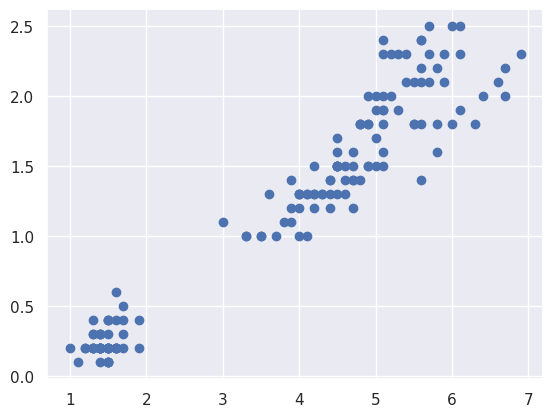

In [ ]:
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
plt.show()

In [ ]:
x = data.iloc[:, 2:4]
x

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


KMEANS

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

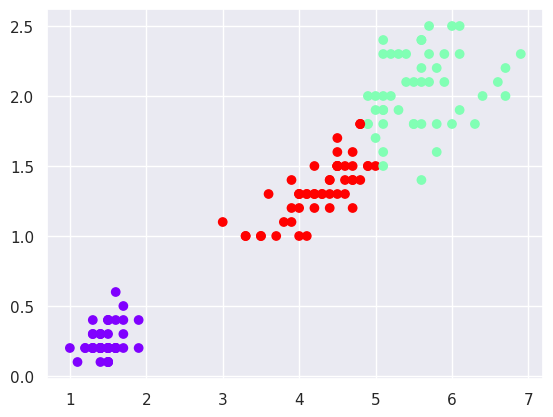

In [ ]:
data_con_cluster = data.copy()
data_con_cluster['clusters'] = identified_clusters # agrgando la columna clusters
plt.scatter(data_con_cluster['PetalLengthCm'], data_con_cluster['PetalWidthCm'], c=data_con_cluster['clusters'], cmap='rainbow')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


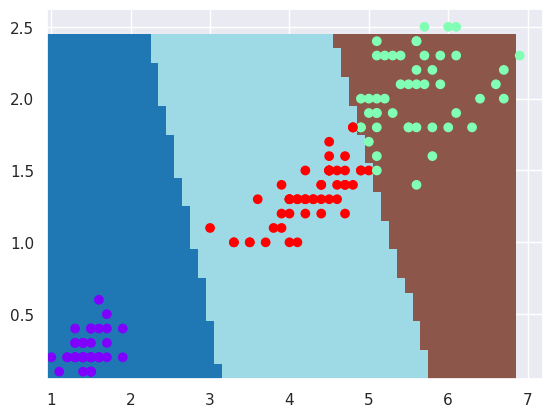

In [ ]:
#  definicion de regiones

h = 0.1
x_min , x_max = min(data['PetalLengthCm']), max(data['PetalLengthCm'])
y_min , y_max = min(data['PetalWidthCm']),  max(data['PetalWidthCm'])

xx , yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # para crear las regiones
stack1 = np.dstack((xx.flatten(), yy.flatten()))[0,:,:]
y_pred = kmeans.predict(stack1)
vb = y_pred.reshape(np.shape(xx))
plt.pcolormesh(xx, yy, vb, cmap='tab20')
plt.scatter(data_con_cluster['PetalLengthCm'], data['PetalWidthCm'], c=data_con_cluster['clusters'], cmap='rainbow')
plt.show()

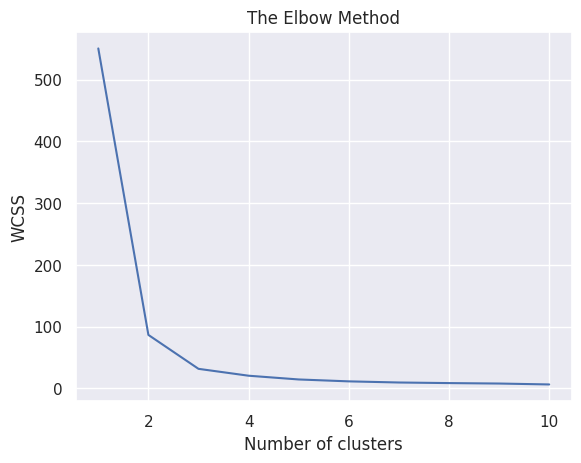

In [ ]:
#determinando  el número de cluster (metodo wcss y  elbow )

wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#ordenando  con  4  grupos

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3], dtype=int32)

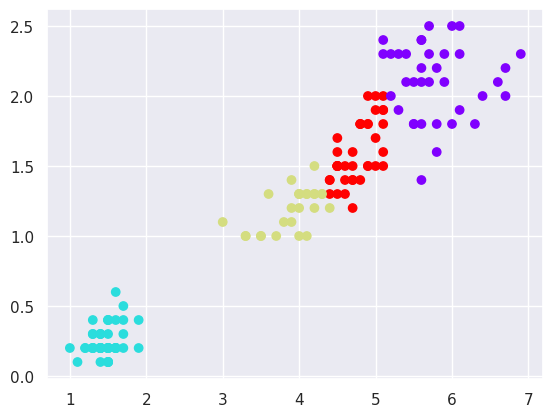

In [ ]:
data_con_cluster = data.copy()
data_con_cluster['clusters'] = identified_clusters # agrgando la columna clusters
plt.scatter(data_con_cluster['PetalLengthCm'], data_con_cluster['PetalWidthCm'], c=data_con_cluster['clusters'], cmap='rainbow')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


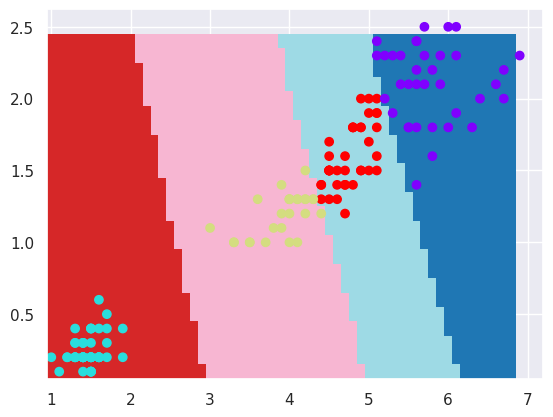

In [ ]:
#  definicion de regiones

h = 0.1
x_min , x_max = min(data['PetalLengthCm']), max(data['PetalLengthCm'])
y_min , y_max = min(data['PetalWidthCm']),  max(data['PetalWidthCm'])

xx , yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # para crear las regiones
stack1 = np.dstack((xx.flatten(), yy.flatten()))[0,:,:]
y_pred = kmeans.predict(stack1)
vb = y_pred.reshape(np.shape(xx))
plt.pcolormesh(xx, yy, vb, cmap='tab20')
plt.scatter(data_con_cluster['PetalLengthCm'], data['PetalWidthCm'], c=data_con_cluster['clusters'], cmap='rainbow')
plt.show()